<a href="https://colab.research.google.com/github/tanakatanakajava/public_machine_learning/blob/main/Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 3)                 9         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 4         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Output:
[[0]
 [1]
 [1]
 [0]]
Output Probability:
[[0.01345363]
 [0.98925185]
 [0.98915815]
 [0.01181322]]


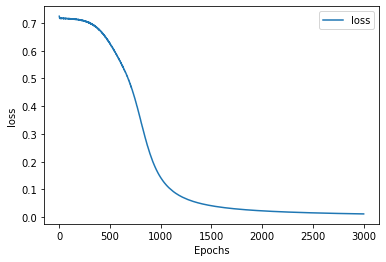

In [ ]:
##################　ライブラリのインポート　##############
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

##################　訓練データの作成と正解データ　##############
#訓練データ
train = np.array([[0,0], # 0と1の組み合わせ行列（4データ，2列）
                  [0,1],
                  [1,0],
                  [1,1]])

#正解データ
label = np.array([[0], # 正解ラベル(4データ，1列)
                  [1],
                  [1],
                  [0]])

#####　以下，XOR演算を学習するニューラルネットワークを設定する　##############
#Sequentialオブジェクト生成
model = Sequential()

#（第1層）隠れ層
model.add(
    Dense(units=3,                #隠れ層のニューロン数は2
          input_dim=2,            #入力層のニューロン数は2
          activation='sigmoid'))  #活性化関数はシグモイド

#（第2層）出力層
model.add(
    Dense(units=1,               # 出力層のニューロン数は1
          activation='sigmoid')) # 活性化関数はシグモイド

model.compile(
    loss='binary_crossentropy', #誤差関数にバイナリ用のクロスエントロピーを指定
    optimizer=SGD(lr=0.1),      #勾配降下法を指定
)

#ニューラルネットワークのサマリー（概要）を出力
model.summary()

##################　ニューラルネットワークで学習を行う　##############
epochs = 3000
batchs = 1

history = model.fit(
    train,         #訓練データ
    label,         #正解ラベル
    epochs = epochs,   #学習回数
    batch_size = batchs,  #ミニバッチのサイズ（今回は全て使用）
    verbose=0,     #学習の進捗状況を表示する
)

##################　学習結果を確認する　##############
# predict_classes()で出力のみを行う
# 0.5をしきい値として0または1を取得
classes = model.predict_classes(train, batch_size=batchs)
#出力された値そのものを取得
prob = model.predict_proba(train, batch_size=batchs)

print('Output:')
print(classes)
print('Output Probability:')
print(prob)


##############　グラフを表示する　####################
plt.plot(range(1,epochs+1), history.history['loss'], label="loss")
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()